# Introduction
In this project, we will examine the data and build different machine learning models that will detect if the mushroom is    edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.
## Dataset
The dataset used in this project is mushrooms.csv that contains 8124 instances of mushrooms with 23 features like cap-          shape, cap-surface, cap-color, bruises, odor, etc.

In [37]:
# import necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

In [38]:
#Read the CSV file of the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")

In [39]:
#take top five rows of a dataframe using with .head()
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### EDA process

In [40]:
#shape of the dataset
df.shape

(8124, 23)

Here we have 8124 rows and 23 columns

In [41]:
#information about the DataFrame including the index dtype and column dtypes, non-null values using with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [42]:
#.describe() method will give you the statistics of the columns.
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#count shows no.of responses
#unique shows no.of categorical values
#top shows  highest categorical value
#freq shows the frequency

In [43]:
#Unique occurrences of ‘class’ column
df["class"].unique()

array(['p', 'e'], dtype=object)

Here we have two unique values are 'p' and 'e'
   ‘p’ is poisonous and ‘e’ is edible

In [44]:
#count of the unique 'class' column
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

here we have e are 4208 occurences and p are 3916 occurencies

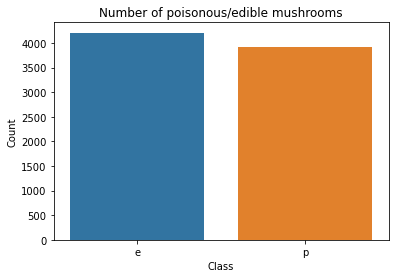

In [45]:
#####Now let’s visualize the count of edible and poisonous mushrooms using Seaborn
count = df["class"].value_counts()
plt.figsize = (5,4)
plt.ylabel("Count")
plt.xlabel("Class")
plt.title("Number of poisonous/edible mushrooms")
sns.barplot(count.index, count.values)
plt.show()

Here we see that data set is balanced

In [46]:
##Data manupilation
##The data is categorical so we’ll use LabelEncoder to convert it to ordinal.
#LabelEncoder converts each value in a column to a number using with for loop
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [47]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Here our colomns are converted categorical values to ordinal values

In [48]:
#now in the dataset coumn 'veil type' is 0 and its not contribute the data so we can remove it
df = df.drop(["veil-type"],axis=1)

In [49]:
#Now check again df 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


See here that colomn was droped

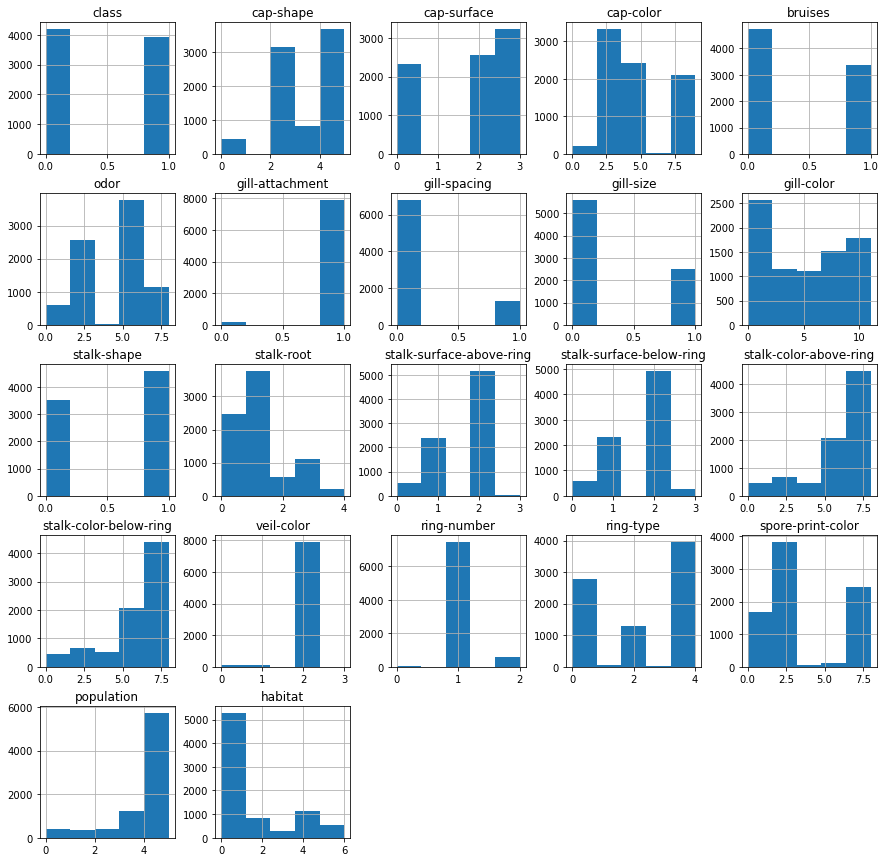

In [50]:
#Take a View of all features to gain insights
df.hist(bins=5, figsize=(15,15));

In [51]:
#Let’s look at the correlation between the variables
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


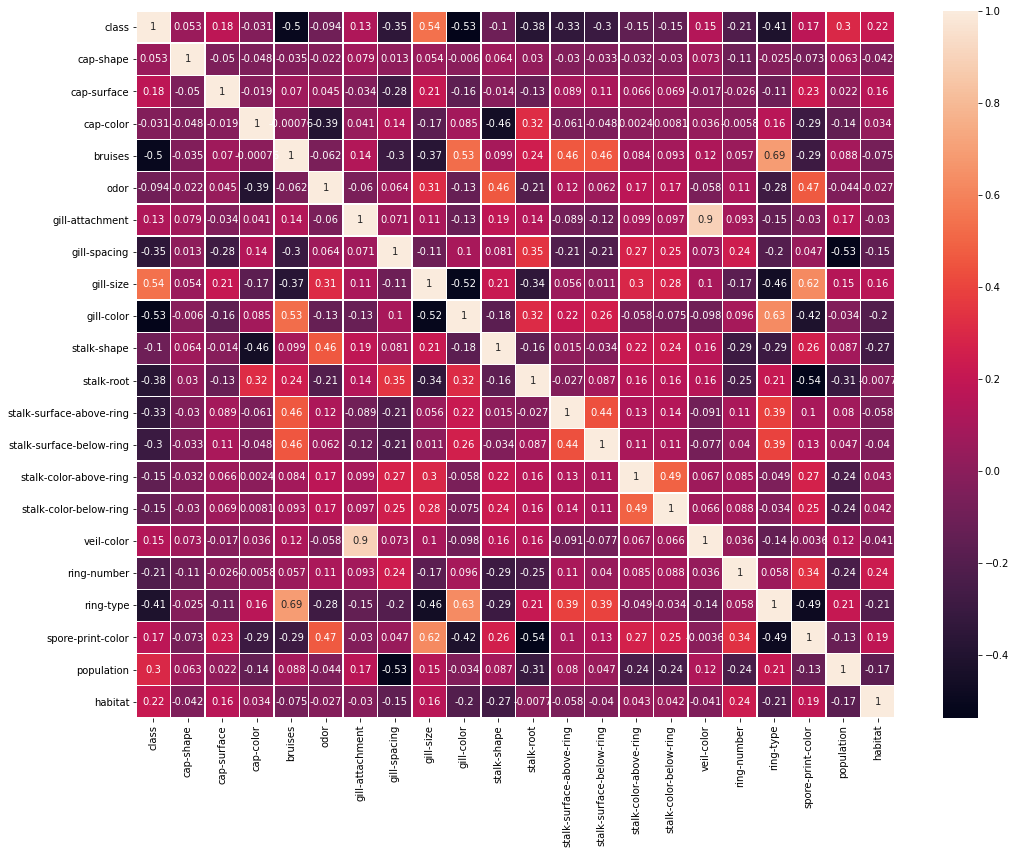

In [52]:
#heat map
fig, ax = plt.subplots(figsize=(17,13))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [53]:
#seperate x and y colomns
y = df["class"].values
x = df.drop(["class"],axis=1)

In [54]:
## Now do the our model building
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [55]:
#check the shape of train test split
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6499, 21), (1625, 21), (6499,), (1625,))

In [56]:
##Classification Methods
##import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [57]:
#Train result
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#Test result
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3388
           1       1.00      1.00      1.00      3111

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

[[3387    1]
 [   1 3110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[820   0]
 [  2 803]]


In [58]:
#train result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#test result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3388
           1       1.00      1.00      1.00      3111

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

[[3388    0]
 [   0 3111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[820   0]
 [  0 805]]


In [97]:
#train result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))

#test result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3388
           1       1.00      1.00      1.00      3111

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

[[3388    0]
 [   0 3111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[820   0]
 [  0 805]]


In [60]:
import warnings 
warnings.filterwarnings('ignore')

In [61]:
#train result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#test result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3388
           1       0.95      0.94      0.95      3111

    accuracy                           0.95      6499
   macro avg       0.95      0.95      0.95      6499
weighted avg       0.95      0.95      0.95      6499

[[3248  140]
 [ 176 2935]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       820
           1       0.96      0.94      0.95       805

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

[[788  32]
 [ 49 756]]


In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
print(cross_val_score(KNN,x,y,cv=5).mean())

0.8808163698370594


In [75]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8959553618794999


In [90]:
print(cross_val_score(DecisionTree,x,y,cv=5).mean())

0.9133150435771127


In [66]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.8393488442591892


In [98]:
from sklearn.metrics import roc_auc_score,roc_curve

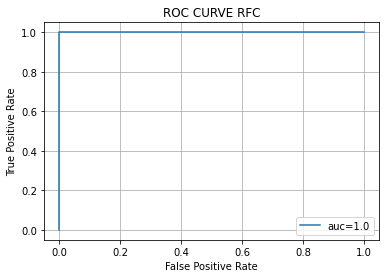

The Score for the ROC Curve is : 100.0%


In [99]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

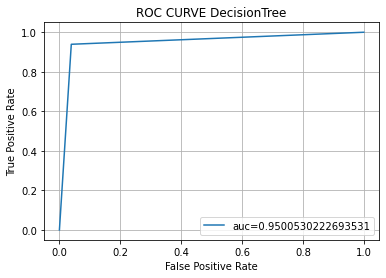

The Score for the ROC Curve is : 95.00999999999999%


In [78]:
#roc_curve plot to check the socre of Decisiontree
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

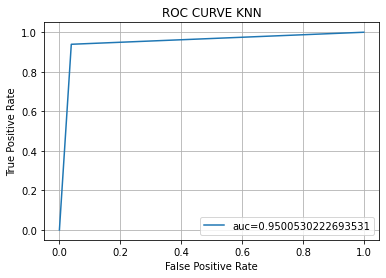

The Score for the ROC Curve is : 95.00999999999999%


In [79]:
#roc_curve plot to check the socre of knn
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

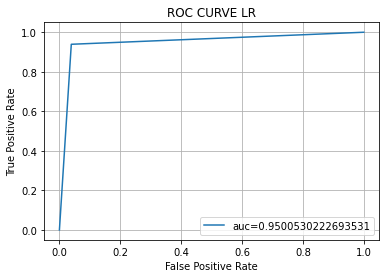

The Score for the ROC Curve is : 95.00999999999999%


In [80]:
#roc_curve plot to check the socre of LogesticRegression
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

# hyper parameter tuning

In [81]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [82]:
params = parameters={'max_depth':list(range(200,400,50)),
            'n_estimators':list(range(10,120,20)),
            'max_features': ['auto', 'sqrt', 'log2'],      
         }

In [83]:
model=RandomForestClassifier()

In [84]:
grid_clf=GridSearchCV(model,parameters,verbose=4,refit=True)


In [85]:
grid_clf.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 2/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 3/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 4/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 5/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 1/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.2s
[CV 2/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.2s
[CV 3/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.1s
[CV 4/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.1s
[CV 5/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.2s
[CV 1/5] END max_depth=200, max_features=auto, n_estimators=50; total time=   0.3s
[CV 2/5] END max_depth=20

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [200, 250, 300, 350],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 30, 50, 70, 90, 110]},
             verbose=4)

In [86]:
clf=grid_clf.best_estimator_
print(clf)

RandomForestClassifier(max_depth=200, n_estimators=10)


In [87]:
clf=grid_clf.best_params_
print(clf)

{'max_depth': 200, 'max_features': 'auto', 'n_estimators': 10}


In [100]:
clf=grid_clf.best_score_
print(clf)

1.0


In [101]:
clf = RandomForestClassifier(max_depth=200, n_estimators=10)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

1.0

In [102]:
y_pred=clf.predict(x_test)

In [103]:
accuracy_score(y_test,y_pred)

1.0

# Conclusion

##### Most of the classification methods hit 100% accuracy with this dataset.
##### RandomForestClassifier is the best accuracy model in this problem statement.

###  We can now eat healthy mushrooms!!  


# Saving the model

In [107]:
import joblib
joblib.dump(clf,'mushroom model.pkl')

['mushroom model.pkl']

# Loading thew model

In [110]:
mod=joblib.load('mushroom model.pkl')
print(mod.predict(x_test))

[0 1 1 ... 1 0 0]
